In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [3]:
df_all_duties = pd.read_csv("stepbackServices.csv", usecols = [i for i in range(0,11)])
df_all_duties

,Serial,Rake Num,Start Station,Start Time,End Station,End Time,Direction,service time,Category,Step Back Rake,Step Back Location
0,336,701,MKPD,05:40,PVGW DN,06:15,DN,35,inducting,No StepBack,No StepBack
1,872,702,VND,05:40,KKDA DN,06:08,DN,28,inducting,No StepBack,No StepBack
2,873,703,VND,05:40,PVGW UP,06:58,UP,78,inducting,No StepBack,No StepBack
3,874,709,IPE,05:45,PVGW UP,06:56,UP,71,inducting,No StepBack,No StepBack
4,875,711,SAKP,05:45,KKDA DN,06:59,DN,74,inducting,No StepBack,No StepBack
...,...,...,...,...,...,...,...,...,...,...,...
929,525,716,PVGW UP,24:13,MKPD,24:48,UP,35,stabling,No StepBack,No StepBack
930,691,719,MUPR,24:22,MUPR,24:41,DN,19,inducting,No StepBack,No StepBack
931,933,730,KKDA DN,24:22,MUPR,24:37,DN,15,stabling,No StepBack,No StepBack
932,526,733,PVGW UP,24:28,MKPR UP,25:03,UP,35,stabling,No StepBack,No StepBack


In [4]:
def time_to_minutes(t):
    h,m = map(int, t.split(':'))
    return h*60 + m

In [5]:
def add_edges(G):
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 != node2:
                # print(node2[2], node2[3])
                transition_time = node1[3] - node2[2]
                if 0 <= abs(transition_time) <= 40 and node1[1] == node2[0]:
                    G.add_edge(node1, node2,weight=transition_time)
    return G

def build_netowrk(df):  # returns network, input dataframe
    G = nx.DiGraph()
    for idx, row in df.iterrows():
        node = (row['Start Station'], row['End Station'], time_to_minutes(row['Start Time']), time_to_minutes(row['End Time']), row['Rake Num'], row['service time'])
        G.add_node(node)
    add_edges(G)
    return G

def draw_network(G, if_edge):    # draws network, if_edge used when we want to draw edges
    pos = nx.spring_layout(G, k=5, iterations=10, scale=10)
    nx.draw_networkx_nodes(G, pos, node_size=2)
    
    if if_edge:
        nx.draw_networkx_edges(G, pos, arrows=True)
        # nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
        # edge_labels = nx.get_edge_attributes(G, 'weight')
        # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title('Network of duties')
    plt.show()

In [61]:
print(len(G.edges()))

12223


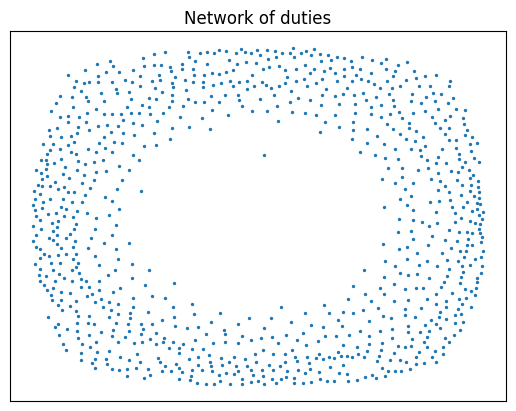

In [6]:
G = build_netowrk(df_all_duties)
draw_network(G, if_edge=False)

In [7]:
G = add_edges(G)
# draw_network(G, if_edge=True)

In [8]:
df_set_of_duties = pd.read_csv('SetOfDuties.csv', header=None, names=[f'col_{i}' for i in range(1, 25)])
# df = pd.read_csv('StepBackServices.csv')

# print(df_set_of_duties)

In [9]:
import pandas as pd
import csv

# Step 1: Read CSV file and process rows
def read_csv(file_path):
    rows = []
    with open(file_path, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            # Convert all values to integers, ignoring empty strings
            clean_row = [int(val) for val in row if val.isdigit()]
            if clean_row:
                rows.append(set(clean_row))  # Store as a set to simplify union operations

    print("read_csv function has completed")
    return rows

file_path = 'SetOfDuties.csv'
rows = read_csv(file_path)

read_csv function has completed


In [9]:
# print(rows[0])
num_duties = 934

def initial_solutions(rows, num_duties):
    tt = []
    for i in range(num_duties):
        for idx, row in enumerate(rows):
            if i in row:
                tt.append(row)
                break
            elif idx == len(rows)-1:
                print("nahi hai")
    return tt

schedule = initial_solutions(rows, num_duties)
print(len(schedule))

934


In [37]:
num_duties = 934

def initial_solutions_2(rows, num_duties):
    tt = []
    to_not_count = set()
    for i in range(num_duties):
        if i not in to_not_count:
            for row in rows:
                if i in row:
                    tt.append(row)
                    for task in row:
                        to_not_count.add(task)
                    break
    return tt

schedule = initial_solutions_2(rows, num_duties)
print(len(schedule))

35
36
37
38
41
42
46
47
50
51
52
53
55
59
62
64
66
67
68
69
70
71
72
73
75
77
79
80
81
83
85
89
91
94
98
106
108
109
110
112
116
118
121
123
124
125
336
337
338
339
340
341
342
343
344
345
346
347
348
349
351
352
353
354
355
357
359
360
361
362
364
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
488
489
491
492
493
494
496
497
498
499
501
506
521
527
530
531
532
533
534
535
536
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
555
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
587
589
590

In [26]:
## minimum overlap

assigned_tasks = set()
selected_duties = []

for duty in rows:
    overlap = any(task in assigned_tasks for task in duty)
    if not overlap:
        selected_duties.append(duty)
        assigned_tasks.update(duty)

print(len(selected_duties))

num_duties = len(selected_duties)
num_tasks = 933
A = np.zeros((num_tasks, num_duties))

for j, duty in enumerate(selected_duties):
    for task in duty:
        A[task-1, j] = 1

142


In [38]:
print(schedule[0], selected_duties[0])

{0, 391, 713, 877, 47, 408, 378, 700} {1, 386, 37, 336, 403, 373, 702}


In [48]:
count = 0
for i, row in enumerate(A):
    if np.sum(row) != 1:
        count += 1

print('number of rows that only have single 1 and total number of rows, ',count, len(A))

number of rows that only have single 1 and total number of rows,  142 142


In [44]:
# A = [[0] * num_duties for _ in range(num_duties)]
# A1 = [[0] * num_duties for _ in range(num_duties)]

# for idx, row in enumerate(schedule):
#     for i in row:
#         A[idx][i] = 1

# for i in range(num_duties):
#     for idx, row in enumerate(schedule):
#         for j in row:
#             A1[i][j] = 1

# chosen_cols = [i for i in range(num_duties)]
# num_cols = len(chosen_cols)
costs = [1 for _ in range(num_duties)]
for i in range(num_duties):
    for j in range(len(selected_duties)):
        # if df_all_duties['Serial'] == selected_duties[j]:
        costs.append(df_all_duties.loc[df_all_duties['Serial'] == selected_duties[j], 'service time'])

b = np.ones(num_duties)

In [47]:
print(len(selected_duties))

142


In [33]:
count, count1, count2 = 0,0,0
for i in range(num_duties):
    for j in range(num_duties):
        if A[i][j] == A1[i][j]:
            count += 1
        if A[i][j] == 1:
            count1+=1
        if A1[i][j] == 1:
            count2+=1
print('count is: ', count)
print('total 1s in A are: ', count1)
print('total 1s in A1 are: ', count2)
print('total elements in A,A1 are: ', num_duties**2)

count is:  859174
total 1s in A are:  8033
total 1s in A1 are:  8033
total elements in A,A1 are:  872356


In [53]:
# A1 = np.matrix(A1)
# A = np.matrix(A)
# A = A.T 
costs = np.ones(934)
# print('costs: ',costs)
# print('A1 = ', A1)
# print('A = ', A)

In [38]:
exists_in_each_row = np.all(np.any(A1 == 1, axis = 1))
# for elem in exists_in_each_row:
#     if elem != True:
#         print(1)
print(exists_in_each_row)
# costs = np.random.rand(num_cols)
print(type(A1))

NameError: name 'A1' is not defined

In [57]:
## Solving initial RMLP using gurobi

import gurobipy as gp
from gurobipy import GRB

model = gp.Model()

x = model.addVars(num_duties, lb = 0, name="x")

for i in range(len(A)):
    model.addConstr(sum(A[i][j] * x[j] for j in range(len(A[i]))) == 1)

model.setObjective(sum(costs[i] * x[i] for i in range(num_duties)), GRB.MINIMIZE)

model.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 142 rows, 934 columns and 0 nonzeros
Model fingerprint: 0x0e8858d6
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 934 columns
Presolve time: 0.01s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Infeasible model


In [14]:
import pyomo.environ as pyo
from pyomo.core import ConcreteModel
from pyomo.opt import SolverFactory, SolverStatus, TerminationCondition

def objectiveRule(model):
    minimumPath = sum(model.x)
    return minimumPath 

model_pyo = ConcreteModel()
model_pyo.x = pyo.Var([i for i in range(num_duties)], domain=pyo.Binary)
model_pyo.OBJ = pyo.ObjectiveList(rule = objectiveRule(model_pyo), sense=pyo.minimize)
model_pyo.consList = pyo.ConstraintList()

for i in range(num_duties):
    model_pyo.consList.add(sum(A1[i][j] * model_pyo.x[j] for j in range(num_duties)) == 1)

ERROR: Constructing component 'OBJ' from data=None failed:
        TypeError: 'int' object is not iterable


TypeError: 'int' object is not iterable

In [35]:
## Solving initial RMLP using linprog

def solve_rmlp(A, b, cost):
    bounds = [(0,None) *len(cost)]
    res = linprog(c = -b, A_eq = A, b_eq = cost, method = 'highs')
    print(res)

    if res.success:
        dual_vars = res.x
        obj_value = -res.fun
        return dual_vars, obj_value
    else:
        raise ValueError("Dual problem did not converge.")

solve_rmlp(A, b, costs)

       message: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
       success: False
        status: 2
           fun: None
             x: None
           nit: 1126
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: None
       ineqlin:  residual: None
                marginals: None


ValueError: Dual problem did not converge.